__Perform clustering (hierarchical,K means clustering and DBSCAN) 
for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.__


## Data Processing

In [1]:
# import libraries

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

In [2]:
#df_air = pd.read_excel("EastWestAirlines.xlsx", sheet_name = ['data'])

df_air = pd.read_csv("EastWestAirlines2.csv")
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
df_air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
#Drop of column 'ID' and min-max scaling/normalization 

scaler = MinMaxScaler()
df_norm = df_air.copy()
df_norm.drop(['ID#'], axis=1, inplace=True)

for (columnName, columnData) in df_norm.iteritems():
    scaler.fit(df_norm[[columnName]])
    df_norm[columnName] = scaler.transform(df_norm[[columnName]])
 
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchical Clustering

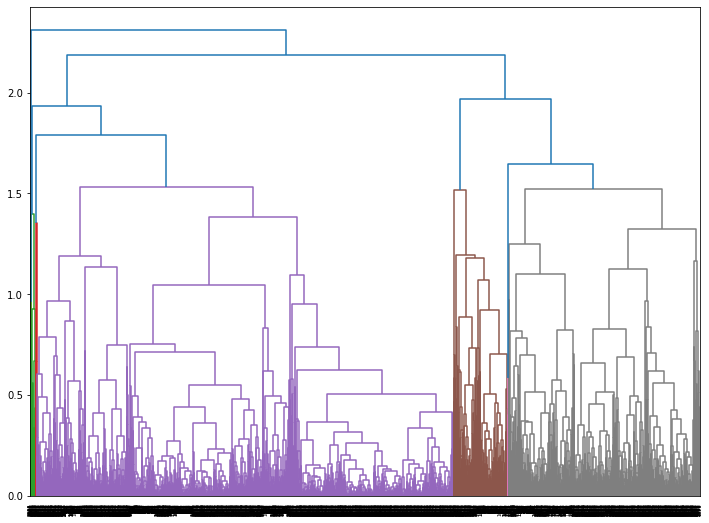

In [7]:
plt.figure(figsize=(12, 9))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [9]:
# create clusters

cluster_hie = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

y_hc = cluster_hie.fit_predict(df_norm)
Clust = pd.DataFrame(y_hc, columns=['Clusters'])

df_air_hie = df_air.copy()
df_air_hie['clusterID'] = Clust.Clusters
count = df_air_hie.groupby(['clusterID']).size()

df_air_hie2 = df_air_hie.groupby('clusterID').agg(['mean'])
df_air_hie2['count'] = count

df_air_hie2.iloc[:, 1:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,count
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,
clusterID,,,,,,,,,,,,
0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1,946
1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0,1011
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0,808
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1,535
4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0,699


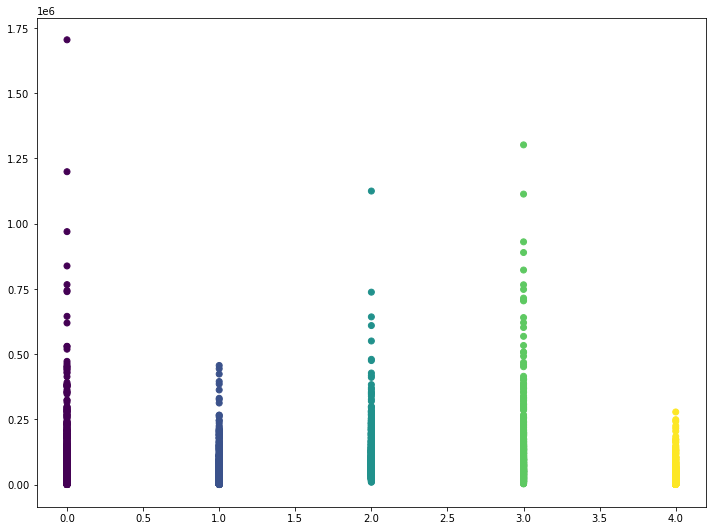

In [37]:
plt.figure(figsize=(12, 9))  
plt.scatter(df_air_hie['clusterID'], df_air_hie['Balance'], c=cluster_hie.labels_)

__Number of clusters are considered as 5, 'Elbow' chart can be used to find out optimal number of clusters.__

__Cluster 0 and 1 has highest records respectively, all other clusters has only 1 record which describes these are far different.
From cluster 0 and 1, cluster id 0 has less miles of all types__
    

# K-MEANS Clustering

In [11]:
from sklearn.cluster import KMeans

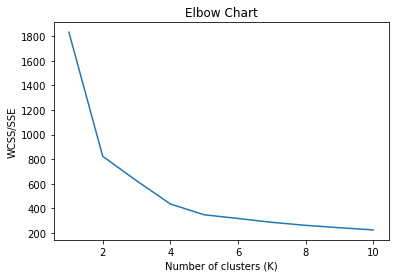

In [12]:
#finding optimum number of cluster, from Elbow chart

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Chart')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS/SSE')
plt.show()

In [17]:
# From the elbow chart, K=4 is set

clusters_km = KMeans(4, random_state=30)
clusters_km.fit(df_norm)

KMeans(n_clusters=4, random_state=30)

In [18]:
clusters_km.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [19]:
clusters_km.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  3.33066907e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -4.44089210e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

In [20]:
df_air_km = df_air.copy()
df_air_km['clusterID'] = clusters_km.labels_
count = df_air_km.groupby(['clusterID']).size()

df_air_km2 = df_air_km.groupby('clusterID').agg(['mean']).reset_index()
df_air_km2['count'] = count

df_air_km2

,clusterID,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,count
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,
0,0,2284.375857,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0,1897
1,1,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,673
2,2,1833.460548,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0,621
3,3,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,808


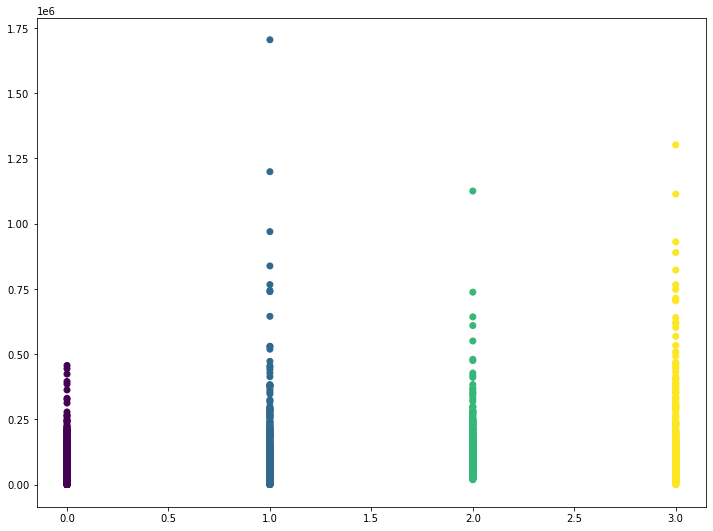

In [33]:
plt.figure(figsize=(12, 9))  
plt.scatter(df_air_km['clusterID'], df_air_km['Balance'], c=clusters_km.labels_)

__From 'Elbow' chart optimum numbers of clusters set is 5__

__Maximum records are in cluster id 3 and minimum are in id 0, cluster 0 also has highest balance and qualifying miles__




# DBSCAN Clustering

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [23]:
array_air = df_air.drop(['ID#'], axis=1).values
stscaler = StandardScaler().fit(array_air)
X = stscaler.transform(array_air)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [30]:
dbscan_air = DBSCAN(eps=0.8, min_samples=6)
dbscan_air.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [31]:
df_air_dbsc = df_air.copy()
df_air_dbsc['clusterid_dbsc'] = dbscan_air.labels_

In [32]:
count = df_air_dbsc.groupby(['clusterid_dbsc']).size()
col = pd.DataFrame(count, columns=['count'])
df_air_dbsc2 = df_air_dbsc.groupby('clusterid_dbsc').agg(['mean'])

pd.concat([df_air_dbsc2, col], axis=1)

,"(ID#, mean)","(Balance, mean)","(Qual_miles, mean)","(cc1_miles, mean)","(cc2_miles, mean)","(cc3_miles, mean)","(Bonus_miles, mean)","(Bonus_trans, mean)","(Flight_miles_12mo, mean)","(Flight_trans_12, mean)","(Days_since_enroll, mean)","(Award?, mean)",count
clusterid_dbsc,,,,,,,,,,,,,
-1,1744.781707,158564.875610,698.553659,2.670732,1.056098,1.059756,35956.408537,20.157317,1805.067073,5.232927,4647.563415,0.654878,820
0,2185.088899,50589.121390,0.676895,1.629964,1.000000,1.000000,8534.324458,8.112365,85.902978,0.291065,3790.477888,0.000000,2216
1,1830.398305,54510.457627,2.118644,2.543432,1.000000,1.000000,21126.111229,12.194915,179.287076,0.590042,4458.901483,1.000000,944
2,2477.833333,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000,12
3,3822.142857,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000,7


__From 'Elbow' chart and after try and tested eps and MinPts, we get numer of clusters 4 and one outlier/noise cluster. 
outlier cluster -1 has 820 records which is anout 16% of total records, and cluster 0 has more than 50% of records.__

__Cluseter id 1 has 944 records, with maximum miles among other clusters 0, 2 and 3.__

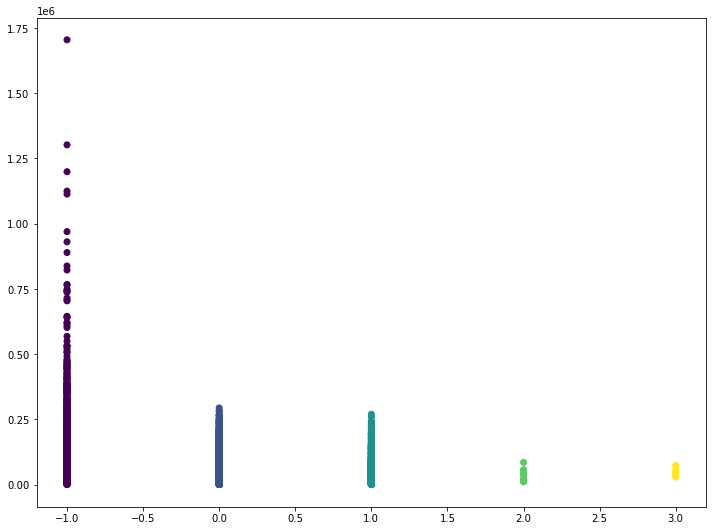

In [35]:
# Plot Clusters
plt.figure(figsize=(12, 9))
plt.scatter(df_air_dbsc['clusterid_dbsc'], df_air_dbsc['Balance'], c=dbscan_air.labels_)